# Test 1: Basic delta function

What is a delta function?

In mathematical analysis, the __Dirac delta function__ (or $\delta$ distribution), also known as the __unit impulse__, is a generalized function on the real numbers, whose value is zero everywhere except at zero, and whose integral over the entire real line is equal to one. Thus, it can be represented heuristically as:

$$
\delta(x) =
\begin{cases} 
0, & x \neq 0, \\
\infty, & x = 0,
\end{cases}
$$

such that

$$
\int_{-\infty}^\infty \delta(x) \, dx = 1.
$$

Since there is no function having this property, modeling the delta "function" rigorously involves the use of limits or, as is common in mathematics, measure theory and the theory of distributions.


In this notebook, we will implement the delta function in Julia and test its properties using Python.

## Import necessary libraries

In [1]:
from juliacall import Main as jl
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

jl.include("./delta_functions.jl")
jl.include("./point_reprojection.jl")

Detected IPython. Loading juliacall extension. See https://juliapy.github.io/PythonCall.jl/stable/compat/#IPython


visualize

In [2]:
# Evaluating the delta function at x=0, x=1, and x=-1

print("Value of delta function at x=0:",jl.delta_function(0))
print("Value of delta function at x=1:",jl.delta_function(1))
print("Value of delta function at x=-1:",jl.delta_function(-1))

Value of delta function at x=0: 1e+100
Value of delta function at x=1: 0.0
Value of delta function at x=-1: 0.0


The delta function defined in the delta_functions.jl file provides the values as expected.

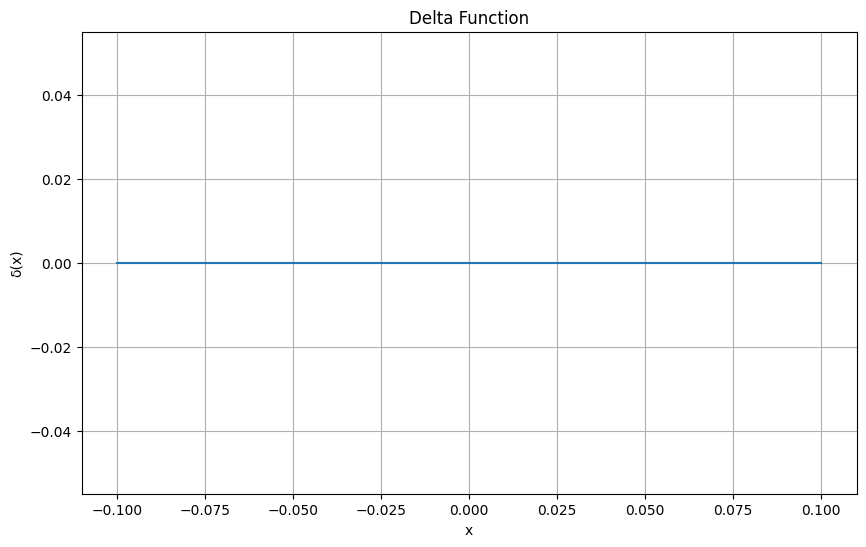

In [3]:
# Visualizing the delta function at x = even values --> No Existence of 0

x_values = np.linspace(-0.1, 0.1, 1000)
delta_values = [jl.delta_function(x) for x in x_values]

plt.figure(figsize=(10, 6))
plt.plot(x_values, delta_values)
plt.title('Delta Function')
plt.xlabel('x')
plt.ylabel('δ(x)')
plt.grid(True)
plt.show()

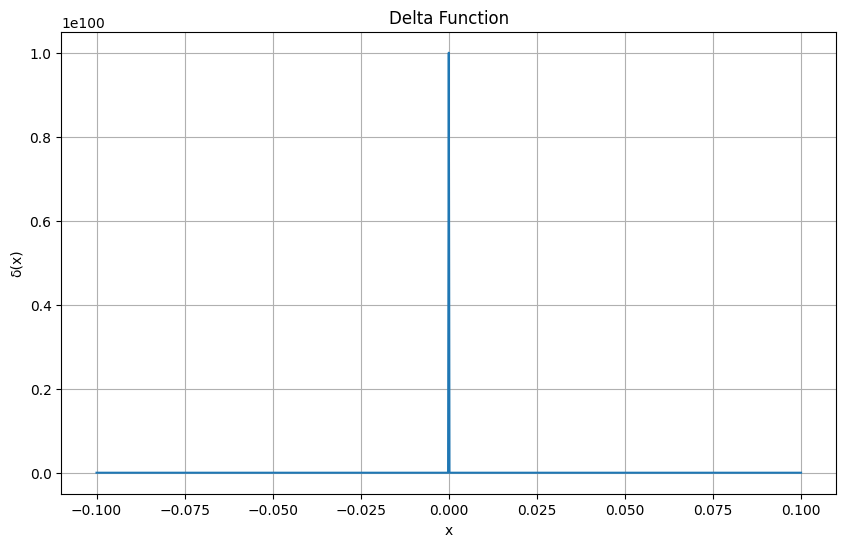

In [4]:
# Visualizing the delta function at x = odd values --> Existence of 0

x_values = np.linspace(-0.1, 0.1, 1001)
delta_values = [jl.delta_function(x) for x in x_values]

plt.figure(figsize=(10, 6))
plt.plot(x_values, delta_values)
plt.title('Delta Function')
plt.xlabel('x')
plt.ylabel('δ(x)')
plt.grid(True)
plt.show()

# Test 2: Delta-n function

The delta-n function is a parameterized version of the delta function, defined as:

$$
\delta_n(x) = n \quad \text{if} \quad |x| < \frac{1}{2n}, 
\quad 0 \quad \text{otherwise}.
$$

As n approaches infinity, this function approaches the true delta function, rather than 0.


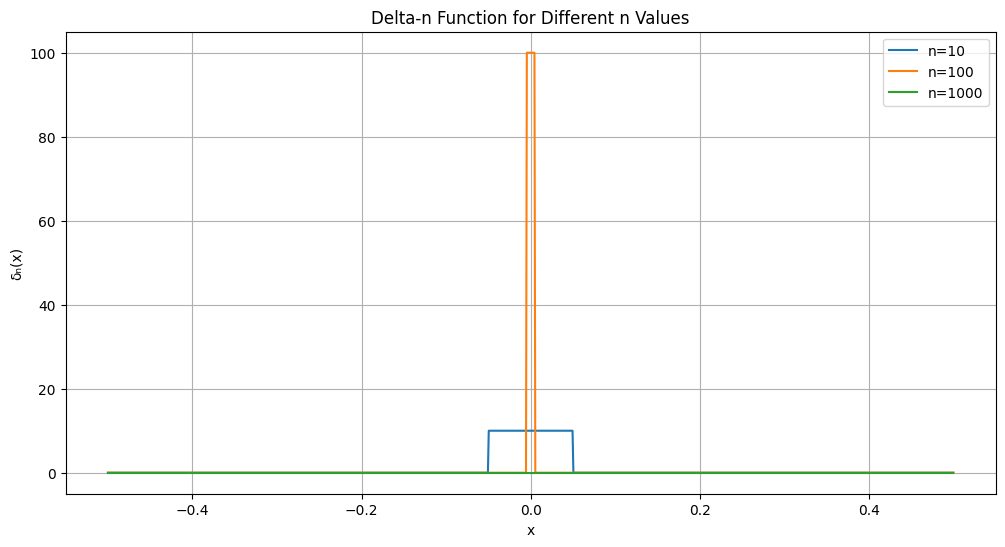

In [5]:
# Cell 3: Test delta_n function for different n values

x_values = np.linspace(-0.5, 0.5, 1000)
n_values = [10, 100, 1000]

plt.figure(figsize=(12, 6))
for n in n_values:
    delta_n_values = [jl.delta_n_function(x, n) for x in x_values]
    plt.plot(x_values, delta_n_values, label=f'n={n}')

plt.title('Delta-n Function for Different n Values')
plt.xlabel('x')
plt.ylabel('δₙ(x)')
plt.legend()
plt.grid(True)
plt.show()

# Test 3: Sifting property

What is Sifting ? 

The sifting property of the delta function states that:

$$
\int_{-\infty}^\infty f(x) \delta(x-a) \, dx = f(a).
$$

This property allows us to extract the value of a function at a specific point by integrating the product of the function and the delta function over the entire real line.



In [6]:
def f(x): return x**2  # Test function x^2
a = 2.0  # Point to evaluate

sifting_result = jl.sifting_property(f, a)
actual_value = f(a)

print(f"Testing sifting property with f(x) = x²")
print(f"Point a = {a}")
print(f"Sifting integral result: {sifting_result}")
print(f"Actual f(a): {actual_value}")
print(f"Relative error: {abs(sifting_result - actual_value)/actual_value}")

Testing sifting property with f(x) = x²
Point a = 2.0
Sifting integral result: 4.0040060156343324
Actual f(a): 4.0
Relative error: 0.0010015039085831123


In [7]:
def f(x): return np.sin(x)  # Test function sin(x)
a = np.pi  # Angle to evaluate

sifting_result = jl.sifting_property(f, a)
actual_value = f(a)

print(f"Testing sifting property with f(x) = sin(x)")
print(f"Point a = {a*180/np.pi} degrees")
print(f"Sifting integral result: {sifting_result}")
print(f"Actual f(a): {actual_value}")
print(f"Relative error: {abs(sifting_result - actual_value)/actual_value}")

Testing sifting property with f(x) = sin(x)
Point a = 180.0 degrees
Sifting integral result: 1.2258733613592733e-16
Actual f(a): 1.2246467991473532e-16
Relative error: 0.0010015640532226161


# Test 4: 2D image sampling

Let's sample a 2D image at specified points using delta functions. 

Why can this be useful? 

2D image sampling using delta functions is useful for several important applications:

1. **Digital Image Processing**

2. **Signal Processing Applications**
3. **Computer Vision Tasks**
4. **Image Reconstruction**
5. **Quality Control and Analysis**

The delta function's sifting property makes it particularly suitable for these applications as it allows us to precisely sample values at specific coordinates.

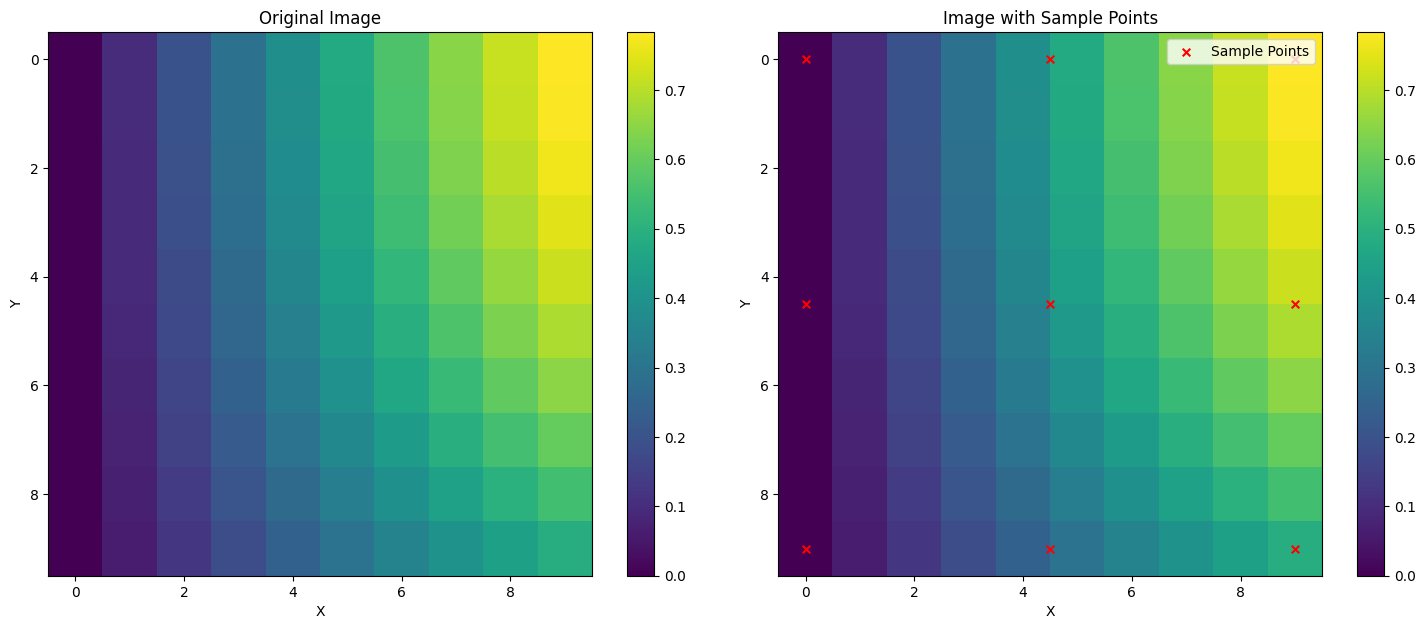

Sampling Results (first 3 points):

Point (0.0, 0.0):
  Original value: 0.000000
  Sampled value: 0.282321
  Relative error: N/A

Point (4.5, 0.0):
  Original value: 0.389418
  Sampled value: 0.205891
  Relative error: 0.471286

Point (9.0, 0.0):
  Original value: 0.783327
  Sampled value: 0.685316
  Relative error: 0.125121


In [8]:
# Create a sample image (with sinusoidal pattern)
width,height = 10, 10
test_image = np.zeros((height, width))
x = np.arange(width)
y = np.arange(height)
X, Y = np.meshgrid(x, y)
test_image = np.sin(X/10) * np.cos(Y/10)

# Create sample points (3X3 grid)
x_points = np.linspace(0, width-1, 3)
y_points = np.linspace(0, height-1, 3)
X_sample, Y_sample = np.meshgrid(x_points, y_points)
sample_points = [(x,y) for x, y in zip(X_sample.flatten(), Y_sample.flatten())]

# Convert to Julia types for sampling
jl.test_image = test_image
jl.sample_points = sample_points

# Sample the image using our Julia sample_2d_image
samples = jl.sample_2d_image(jl.test_image, jl.sample_points)

# Visualization
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Original image
im1 = ax1.imshow(test_image, cmap='viridis')
plt.colorbar(im1, ax=ax1)
ax1.set_title('Original Image')
ax1.set_xlabel('X')
ax1.set_ylabel('Y')

# Image with sample points
im2 = ax2.imshow(test_image, cmap='viridis')
plt.colorbar(im2, ax=ax2)
ax2.scatter([p[0] for p in sample_points], 
            [p[1] for p in sample_points], 
            color='red', 
            s=30, 
            marker='x', 
            label='Sample Points')
ax2.set_title('Image with Sample Points')
ax2.set_xlabel('X')
ax2.set_ylabel('Y')
ax2.legend()

plt.tight_layout()
plt.show()

# Compare original vs sampled values
print("Sampling Results (first 3 points):")
for i, (x, y) in enumerate(sample_points[:3]):
    x_int, y_int = int(round(x)), int(round(y))
    original_value = test_image[y_int, x_int]
    sampled_value = samples[i]
    print(f"\nPoint ({x:.1f}, {y:.1f}):")
    print(f"  Original value: {original_value:.6f}")
    print(f"  Sampled value: {sampled_value:.6f}")
    if abs(original_value) > 1e-10:  # To avoid division by zero
        rel_error = abs(original_value - sampled_value)/abs(original_value)
        print(f"  Relative error: {rel_error:.6f}")
    else:
        print("  Relative error: N/A")

# Test 5: Point Reprojection

What is point reprojection? 

Point reprojection is the process of projecting a 3D point onto a 2D image plane using various techniques, the one that we will be using is the Projective Transformation

Some of the other techniques are:

1. Orthographic Projection
2. Affine Transformation
3. Perspective Transformation



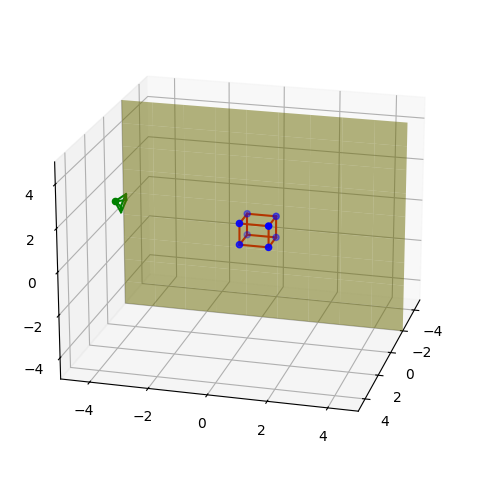

In [25]:
# plotting a 3d cube
sample_3d_cube = np.array([[0,0,0], [1,0,0], [0,1,0], [1,1,0], [0,0,1], [1,0,1], [0,1,1], [1,1,1]])
plt.figure(figsize=(10, 6))
ax = plt.axes(projection='3d')
ax.scatter3D(sample_3d_cube[:, 0], sample_3d_cube[:, 1], sample_3d_cube[:, 2], c='blue', marker='o')

# Define cube edges
lines = [[[0,0,0], [1,0,0]], [[0,0,0], [0,1,0]], [[0,0,0], [0,0,1]], 
         [[1,0,0], [1,1,0]], [[1,0,0], [1,0,1]], [[0,1,0], [1,1,0]], 
         [[0,1,0], [0,1,1]], [[0,0,1], [1,0,1]], [[0,1,1], [1,1,1]], 
         [[0,0,1], [0,1,1]], [[1,1,1], [1,1,0]], [[1,1,1], [1,0,1]]]

# Draw cube edges
for line in lines:
    x_coords = [point[0] for point in line]
    y_coords = [point[1] for point in line]
    z_coords = [point[2] for point in line]
    ax.plot3D(x_coords, y_coords, z_coords, c='red')

# Set plot limits
scale = 5
ax.set_xlim(-scale, scale)
ax.set_ylim(-scale, scale)
ax.set_zlim(-scale, scale)

# Camera setup
camera_position = np.array([2, -4, 2])  # Camera position
cube_center = np.mean(sample_3d_cube, axis=0)  # Calculate center of cube
camera_direction = cube_center - camera_position
camera_direction = camera_direction / np.linalg.norm(camera_direction)  # Normalize direction vector

# Set up camera coordinate system
camera_up = np.array([0, 0, 1])  # Initial up direction
camera_right = np.cross(camera_direction, camera_up)
camera_right = camera_right / np.linalg.norm(camera_right)  # Normalize
camera_up = np.cross(camera_right, camera_direction)  # Recalculate up to ensure orthogonality
camera_up = camera_up / np.linalg.norm(camera_up)  # Normalize
camera_size = 0.3  # Camera frustum size

# Define camera pyramid vertices
pyramid_vertices = np.array([
    camera_position,  # Apex
    camera_position + camera_size * (-camera_right + camera_direction - camera_up),  # Base corners
    camera_position + camera_size * (camera_right + camera_direction - camera_up),
    camera_position + camera_size * (camera_right + camera_direction + camera_up),
    camera_position + camera_size * (-camera_right + camera_direction + camera_up)
])

# Draw camera pyramid edges
for i in range(1, 5):
    x = [pyramid_vertices[0][0], pyramid_vertices[i][0]]
    y = [pyramid_vertices[0][1], pyramid_vertices[i][1]]
    z = [pyramid_vertices[0][2], pyramid_vertices[i][2]]
    ax.plot3D(x, y, z, 'g-')

# Draw camera pyramid base
base_indices = [1, 2, 3, 4, 1]
x = [pyramid_vertices[i][0] for i in base_indices]
y = [pyramid_vertices[i][1] for i in base_indices]
z = [pyramid_vertices[i][2] for i in base_indices]
ax.plot3D(x, y, z, 'g-')

# Draw camera position marker
ax.scatter3D(camera_position[0], camera_position[1], camera_position[2], c='green', marker='o')
def create_rotated_plane(scale, center, rotation_angles, num_points=10):
    """
    Create a plane with specified rotation and translation
    
    Args:
        scale: Size of the plane
        center: (x, y, z) translation of plane center
        rotation_angles: (rx, ry, rz) rotation angles in degrees
        num_points: Resolution of the plane grid
    """
    # Create base plane points
    x_plane = np.linspace(-scale, scale, num_points)
    y_plane = np.linspace(-scale, scale, num_points)
    X_plane, Y_plane = np.meshgrid(x_plane, y_plane)
    Z_plane = np.zeros_like(X_plane)
    
    # Convert to homogeneous coordinates
    points = np.stack([X_plane.flatten(), Y_plane.flatten(), Z_plane.flatten(), np.ones_like(X_plane.flatten())])
    
    # Create rotation matrices
    rx, ry, rz = np.radians(rotation_angles)
    Rx = np.array([[1, 0, 0, 0],
                   [0, np.cos(rx), -np.sin(rx), 0],
                   [0, np.sin(rx), np.cos(rx), 0],
                   [0, 0, 0, 1]])
    
    Ry = np.array([[np.cos(ry), 0, np.sin(ry), 0],
                   [0, 1, 0, 0],
                   [-np.sin(ry), 0, np.cos(ry), 0],
                   [0, 0, 0, 1]])
    
    Rz = np.array([[np.cos(rz), -np.sin(rz), 0, 0],
                   [np.sin(rz), np.cos(rz), 0, 0],
                   [0, 0, 1, 0],
                   [0, 0, 0, 1]])
    
    # Create translation matrix
    T = np.array([[1, 0, 0, center[0]],
                  [0, 1, 0, center[1]],
                  [0, 0, 1, center[2]],
                  [0, 0, 0, 1]])
    
    # Apply transformations
    transform = T @ Rz @ Ry @ Rx
    transformed_points = transform @ points
    
    # Convert back to 3D coordinates
    X_transformed = transformed_points[0].reshape(num_points, num_points)
    Y_transformed = transformed_points[1].reshape(num_points, num_points)
    Z_transformed = transformed_points[2].reshape(num_points, num_points)
    
    return X_transformed, Y_transformed, Z_transformed

# Example usage:
center = [-2, 0, 0]  # Translation (x, y, z)
rotation = [0, 90, 0]  # Rotation angles in degrees (around x, y, z axes)
X_plane, Y_plane, Z_plane = create_rotated_plane(scale, center, rotation)

# Add the transformed plane
ax.plot_surface(X_plane, Y_plane, Z_plane, color='yellow', alpha=0.5)


# Optional: Set the view angle for better visualization
ax.view_init(elev=20, azim=15)

plt.show()

IndexError: list index out of range

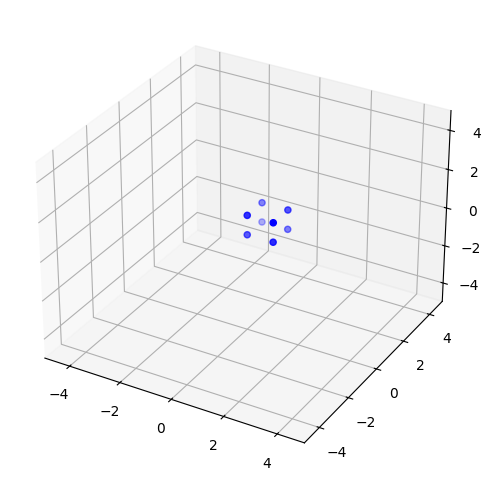

In [26]:
class Camera:
    def __init__(self, position=np.array([2, -4, 2]), up=np.array([0, 0, 1]), size=0.3):
        """
        Initialize camera parameters
        
        Args:
            position (np.ndarray): Camera position in 3D space
            up (np.ndarray): Camera up vector
            size (float): Size of camera frustum
        """
        self._position = position
        self._up = up
        self._size = size
        self._direction = None
        self._right = None
        self._vertices = None
        
    @property
    def position(self):
        return self._position
    
    @position.setter
    def position(self, value):
        self._position = np.array(value)
        self._update_camera()
        
    @property
    def size(self):
        return self._size
    
    @size.setter
    def size(self, value):
        self._size = value
        self._update_camera()
    
    def look_at(self, target):
        """Update camera direction to look at target"""
        self._direction = target - self.position
        self._direction = self._direction / np.linalg.norm(self._direction)
        self._update_camera()
    
    def _update_camera(self):
        """Update camera coordinate system"""
        if self._direction is None:
            return
            
        self._right = np.cross(self._direction, self._up)
        self._right = self._right / np.linalg.norm(self._right)
        self._up = np.cross(self._right, self._direction)
        self._up = self._up / np.linalg.norm(self._up)
        
        self._update_vertices()
    
    def _update_vertices(self):
        """Calculate camera frustum vertices"""
        self._vertices = np.array([
            self.position,  # Apex
            self.position + self.size * (-self._right + self._direction - self._up),
            self.position + self.size * (self._right + self._direction - self._up),
            self.position + self.size * (self._right + self._direction + self._up),
            self.position + self.size * (-self._right + self._direction + self._up)
        ])
    
    def draw(self, ax):
        """Draw camera frustum"""
        if self._vertices is None:
            return
            
        # Draw edges from apex to base
        for i in range(1, 5):
            ax.plot3D([self._vertices[0][0], self._vertices[i][0]],
                     [self._vertices[0][1], self._vertices[i][1]],
                     [self._vertices[0][2], self._vertices[i][2]], 'g-')
        
        # Draw base
        base_indices = [1, 2, 3, 4, 1]
        ax.plot3D([self._vertices[i][0] for i in base_indices],
                 [self._vertices[i][1] for i in base_indices],
                 [self._vertices[i][2] for i in base_indices], 'g-')
        
        # Draw camera position marker
        ax.scatter3D(self.position[0], self.position[1], self.position[2], 
                    c='green', marker='o')

class Cube:
    def __init__(self, origin=np.array([0, 0, 0]), size=1):
        """
        Initialize cube parameters
        
        Args:
            origin (np.ndarray): Origin point of cube
            size (float): Size of cube edges
        """
        self._origin = np.array(origin)
        self._size = size
        self._vertices = None
        self._edges = None
        self._update_geometry()
    
    @property
    def center(self):
        return self._origin + self._size/2
    
    def _update_geometry(self):
        """Update cube vertices and edges"""
        o = self._origin
        s = self._size
        
        # Create vertices
        self._vertices = np.array([
            o + [0,0,0], o + [s,0,0], o + [0,s,0], o + [s,s,0],
            o + [0,0,s], o + [s,0,s], o + [0,s,s], o + [s,s,s]
        ])
        
        # Define edges as pairs of vertex indices
        edge_indices = [
            (0,1), (0,2), (0,4), (1,3), (1,5), (2,3),
            (2,6), (4,5), (4,6), (7,3), (7,5), (7,6)
        ]
        
        # Create edges using vertex coordinates
        self._edges = []
        for start_idx, end_idx in edge_indices:
            self._edges.append([
                self._vertices[start_idx],
                self._vertices[end_idx]
            ])
    
    def draw(self, ax):
        """Draw cube"""
        # Draw vertices
        ax.scatter3D(self._vertices[:, 0], self._vertices[:, 1], 
                    self._vertices[:, 2], c='blue', marker='o')
        
        # Draw edges
        for edge in self._edges:
            start, end = edge
            ax.plot3D([start[0], end[0]],
                     [start[1], end[1]],
                     [start[2], end[2]], c='red')

class Plane:
    def __init__(self, center=[0,0,0], rotation=[0,0,0], scale=5, num_points=10):
        """
        Initialize plane parameters
        
        Args:
            center (list): Center position of plane
            rotation (list): Rotation angles in degrees [rx,ry,rz]
            scale (float): Size of plane
            num_points (int): Resolution of plane grid
        """
        self._center = np.array(center)
        self._rotation = np.array(rotation)
        self._scale = scale
        self._num_points = num_points
        self._surface = None
        self._update_geometry()
    
    @property
    def center(self):
        return self._center
    
    @center.setter
    def center(self, value):
        self._center = np.array(value)
        self._update_geometry()
    
    @property
    def rotation(self):
        return self._rotation
    
    @rotation.setter
    def rotation(self, value):
        self._rotation = np.array(value)
        self._update_geometry()
    
    def _update_geometry(self):
        """Update plane geometry"""
        x_plane = np.linspace(-self._scale, self._scale, self._num_points)
        y_plane = np.linspace(-self._scale, self._scale, self._num_points)
        X_plane, Y_plane = np.meshgrid(x_plane, y_plane)
        Z_plane = np.zeros_like(X_plane)
        
        points = np.stack([X_plane.flatten(), Y_plane.flatten(), 
                          Z_plane.flatten(), np.ones_like(X_plane.flatten())])
        
        # Create transformation matrices
        rx, ry, rz = np.radians(self._rotation)
        Rx = np.array([[1, 0, 0, 0],
                      [0, np.cos(rx), -np.sin(rx), 0],
                      [0, np.sin(rx), np.cos(rx), 0],
                      [0, 0, 0, 1]])
        
        Ry = np.array([[np.cos(ry), 0, np.sin(ry), 0],
                      [0, 1, 0, 0],
                      [-np.sin(ry), 0, np.cos(ry), 0],
                      [0, 0, 0, 1]])
        
        Rz = np.array([[np.cos(rz), -np.sin(rz), 0, 0],
                      [np.sin(rz), np.cos(rz), 0, 0],
                      [0, 0, 1, 0],
                      [0, 0, 0, 1]])
        
        T = np.array([[1, 0, 0, self._center[0]],
                     [0, 1, 0, self._center[1]],
                     [0, 0, 1, self._center[2]],
                     [0, 0, 0, 1]])
        
        transform = T @ Rz @ Ry @ Rx
        transformed = transform @ points
        
        self._surface = (
            transformed[0].reshape(self._num_points, self._num_points),
            transformed[1].reshape(self._num_points, self._num_points),
            transformed[2].reshape(self._num_points, self._num_points)
        )
    
    def draw(self, ax, color='yellow', alpha=0.5):
        """Draw plane"""
        if self._surface is not None:
            ax.plot_surface(*self._surface, color=color, alpha=alpha)

def setup_scene(scale=5):
    """Setup the 3D scene"""
    fig = plt.figure(figsize=(10, 6))
    ax = plt.axes(projection='3d')
    ax.set_xlim(-scale, scale)
    ax.set_ylim(-scale, scale)
    ax.set_zlim(-scale, scale)
    return fig, ax

# Usage example:
fig, ax = setup_scene()

# Create and draw cube
cube = Cube()
cube.draw(ax)

# Create and setup camera
camera = Camera()
camera.look_at(cube.center)
camera.draw(ax)

# Create and draw plane
plane = Plane(center=[-2, 0, 0], rotation=[0, 90, 0])
plane.draw(ax)

ax.view_init(elev=20, azim=15)
plt.show()